Random Forest is an ensemble learning method for classification and regression tasks. It operates by constructing a multitude of decision trees during training and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual tree

* Ensemble : group of decision trees
* Sampling with replacement,Bagging and Aggregation
* Chooses sqrt(N) features while making trees and select the best featrue
*



## RandomForest

In [37]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris(as_frame=True)


X_iris = iris.data[['petal length (cm)','petal width (cm)']].values
y_iris = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=4, random_state=42)

# Train the Random Forest classifier
rf_classifier.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


<Figure size 1000x500 with 0 Axes>

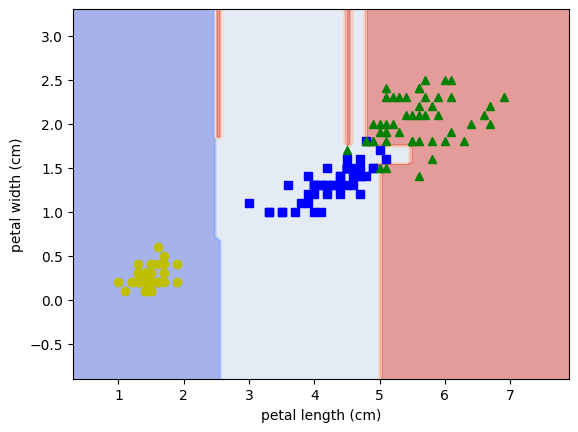

In [38]:
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
disp = DecisionBoundaryDisplay.from_estimator(rf_classifier,
                                              X_test,

                                              response_method='predict',
                                              xlabel='petal length (cm)',
                                              ylabel='petal width (cm)',
                                              alpha=0.5,
                                              cmap=plt.cm.coolwarm)

plt.plot(X_iris[:,0][y_iris==0],X_iris[:,1][y_iris==0],'yo')
plt.plot(X_iris[:,0][y_iris==1],X_iris[:,1][y_iris==1],'bs')
plt.plot(X_iris[:,0][y_iris==2],X_iris[:,1][y_iris==2],'g^')
plt.show()

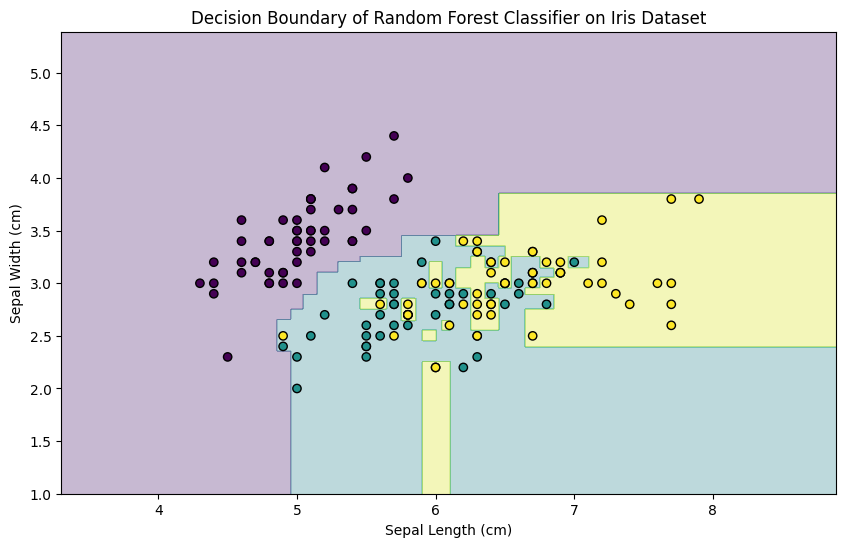

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

# Load the Iris dataset
iris = load_iris()
X, y = iris.data[:, :2], iris.target

# Fit a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=2, random_state=42)
rf_classifier.fit(X, y)

# Define meshgrid of points
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict class probabilities for each point in meshgrid
Z = rf_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Decision Boundary of Random Forest Classifier on Iris Dataset')
plt.show()

## Extra Trees: Extremely Random trees
  * Ensemble technique : where we have group of models or predictors
  * At each node threshold for split is randomized
  * Selecting the best feature from subset is same as RandomForest
  * It will have multiple trees.
  

## Voting classifier:

* Ensemble
* models can be different - base models (it can be any classifier like Logistic,KNN,SVM etc)

* The output will be :
    * Hard : {0,1,2,1,1}  max votes
    * Soft : {98%,1%,2%},{96%,1%,2%} {2%,3%,98%} --> avg(i) -->high-->class


    In case  of soft voting probabilities will be taken , where avg(prob) will be taken that is the reason we need to ensure all the models gives the probabilities as the output o/w it wont work.

    



In [40]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize base classifiers
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
lr_classifier = LogisticRegression(max_iter=1000, random_state=42)
svm_classifier = SVC(kernel='linear', probability=True, random_state=42)

# Initialize Voting Classifier
voting_classifier = VotingClassifier(
    estimators=[('rf', rf_classifier), ('lr', lr_classifier), ('svm', svm_classifier)],
    voting='hard'  # or 'soft' for soft voting
)

# Train the Voting Classifier
voting_classifier.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = voting_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


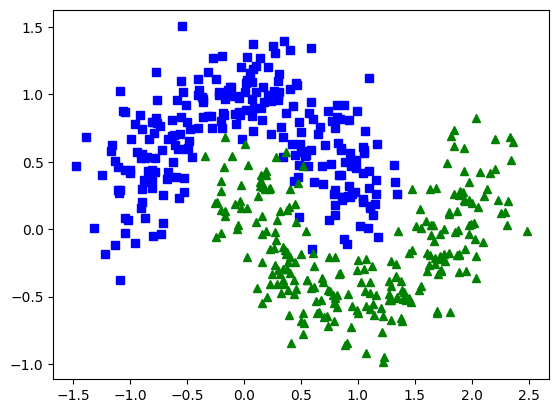

In [41]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=500,noise=0.2,random_state=42)

plt.plot(X[:,0][y==0],X[:,1][y==0],'bs')
plt.plot(X[:,0][y==1],X[:,1][y==1],'g^')
plt.show()

In [42]:
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier

In [43]:
clf1 = RandomForestClassifier(n_estimators=10,max_depth=5,min_samples_split=2,random_state=42)
clf2 = ExtraTreesClassifier(n_estimators=10,max_depth=5,min_samples_split=2,random_state=42)


clf1.fit(X,y)
clf2.fit(X,y)

ExtraTreesClassifier(max_depth=5, n_estimators=10, random_state=42)

In [44]:
from sklearn.metrics import accuracy_score

print("RandomForestClassifier :",accuracy_score(y,clf1.predict(X)))
print("ExtraTreesClassifier",accuracy_score(y,clf2.predict(X)))

RandomForestClassifier : 0.97
ExtraTreesClassifier 0.92


<Figure size 1000x500 with 0 Axes>

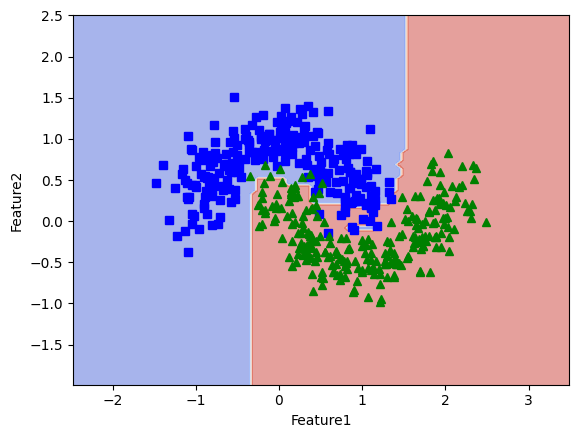

In [45]:
from sklearn.inspection import DecisionBoundaryDisplay
plt.figure(figsize=(10,5))
disp = DecisionBoundaryDisplay.from_estimator(clf1,
                                              X,
                                              response_method='predict',
                                              xlabel='Feature1',
                                              ylabel='Feature2',
                                              alpha=0.5,
                                              cmap=plt.cm.coolwarm)


plt.plot(X[:,0][y==0],X[:,1][y==0],'bs')
plt.plot(X[:,0][y==1],X[:,1][y==1],'g^')
plt.show()

<Figure size 1000x500 with 0 Axes>

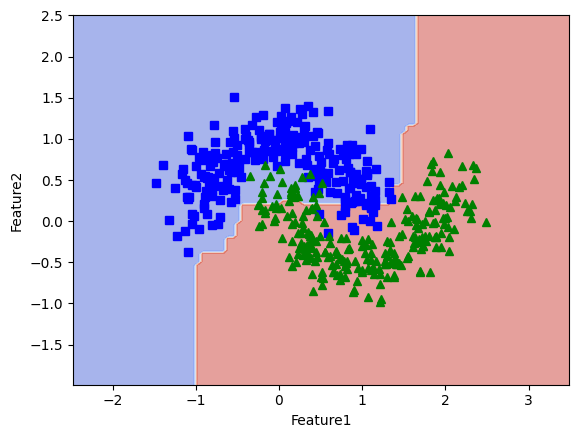

In [46]:
from sklearn.inspection import DecisionBoundaryDisplay
plt.figure(figsize=(10,5))
disp = DecisionBoundaryDisplay.from_estimator(clf2,
                                              X,

                                              response_method='predict',
                                              xlabel='Feature1',
                                              ylabel='Feature2',
                                              alpha=0.5,
                                              cmap=plt.cm.coolwarm)


plt.plot(X[:,0][y==0],X[:,1][y==0],'bs')
plt.plot(X[:,0][y==1],X[:,1][y==1],'g^')
plt.show()

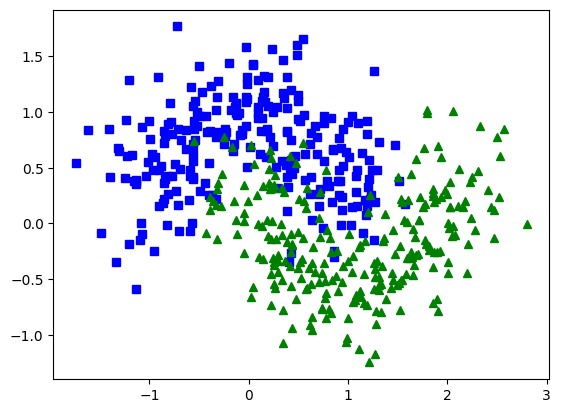

In [47]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=500,noise=0.3,random_state=42)

plt.plot(X[:,0][y==0],X[:,1][y==0],'bs')
plt.plot(X[:,0][y==1],X[:,1][y==1],'g^')
plt.show()

## Voting classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


you can use the same model with different parameters in case of VotingClassifier

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
vclf = VotingClassifier(
    estimators=[
        ('lr',LogisticRegression(random_state=42)),
        ('dt',DecisionTreeClassifier(max_depth=3,random_state=42)),
        ('svc',SVC(random_state=42))
        ]
)


In [51]:
vclf.fit(X_train,y_train)

for name,clf in vclf.named_estimators_.items():
  print(name,'=',clf.score(X_test,y_test))


print('Voting classifier ',vclf.score(X_test,y_test))

lr = 0.85
dt = 0.89
svc = 0.87
Voting classifier  0.87


In [52]:
vclf.predict(X_test[:1])

array([0])

In [53]:
[clf.predict(X_test[:1]) for clf in vclf.estimators_]

[array([0]), array([1]), array([0])]

In [54]:
vclf.voting='soft'
vclf.named_estimators['svc'].probability=True

vclf.fit(X_train,y_train)
vclf.score(X_test,y_test)

0.9

In [55]:
  [clf.predict_proba(X_test[:1]) for clf in vclf.estimators_]

[array([[0.52065538, 0.47934462]]),
 array([[0.3164557, 0.6835443]]),
 array([[0.61444514, 0.38555486]])]

In [56]:
vclf.predict_proba(X_test[:1])

array([[0.48385207, 0.51614793]])